### Diabetes Prediction with SVM
https://www.kaggle.com/omkarjc27/predict-diabetes-using-svm-100-accuracy?scriptVersionId=38390126

In [28]:
#Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,metrics

In [29]:
#Preprocessing & Visualizing Data

df=pd.read_csv('/content/Pima_Indians_Diabetes.csv', sep=',')
dataset = df.values
positives = dataset[dataset[:,8]==1,:]
negatives = dataset[dataset[:,8]==0,:]

# Import train_test_split function
y = dataset[:,-1]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(dataset[:,:],y, test_size=0.3,random_state=42)

# Standardize features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

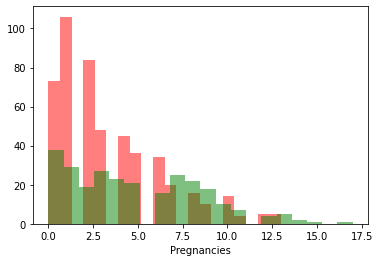

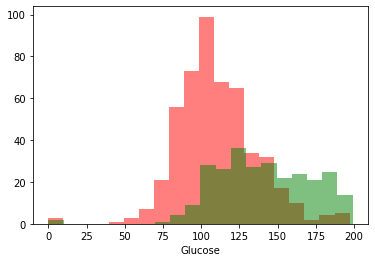

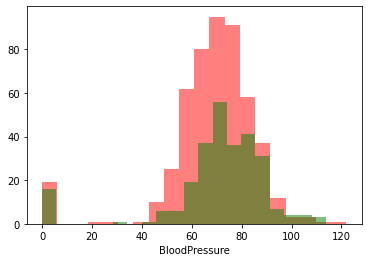

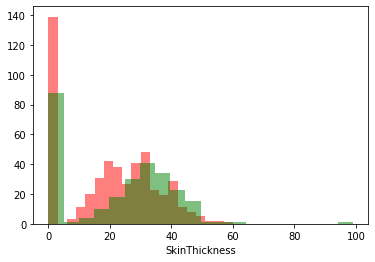

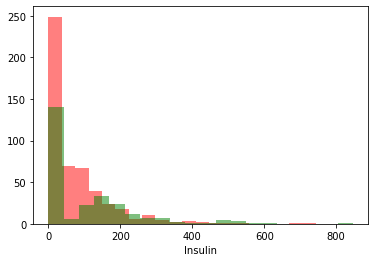

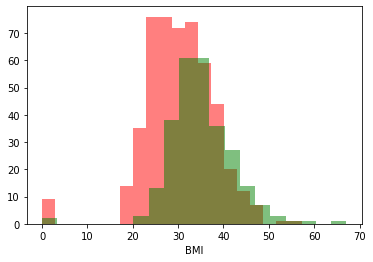

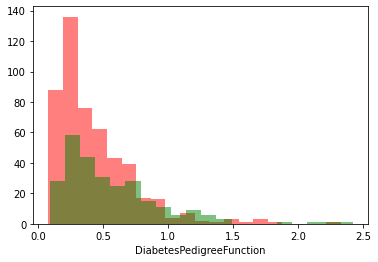

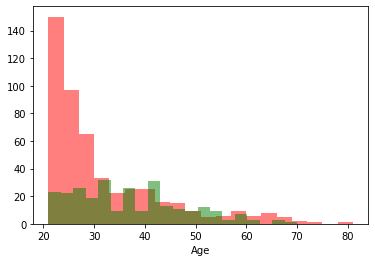

In [30]:
for i in range(8):
  n, bins, patches = plt.hist(negatives[:,i], 20, facecolor='red', alpha=0.5)
  n, bins, patches = plt.hist(positives[:,i], 20, facecolor='green', alpha=0.5)
  plt.xlabel(df.columns[i])
  plt.show()

### by Kaggle Expert
https://www.kaggle.com/priyankamohanta/pima-diabetes

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

'''
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
'''

#data=pd.read_csv('../input/pima-prediction/datasets_228_482_diabetes.csv')
data=pd.read_csv('https://raw.githubusercontent.com/jiai-edu/teaching_ep_elementary-phython/master/datasets/Pima_Indians_Diabetes.csv')

In [36]:
data

Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]

In [37]:
data.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [38]:
data.tail()

Pregnancies  Glucose  ...  Age  Outcome
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[5 rows x 9 columns]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
a=data.describe(include='all')
a

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

#### Description of the dataset
- Pregnancies-Number of times pregnant
- Glucose-Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure-Diastolic blood pressure
- SkinThickness-Triceps skin fold thickness (mm)
- Insulin-2-Hour serum insulin (mu
- BMI-Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction-Diabetes pedigree function
- Age-Age (years)
- Outcome-Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [41]:
##Check the dtypes of this dataset
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [42]:
##Check the null values of this dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- This dataset has not null value..It is a clean dataset

#### Analyzing the dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


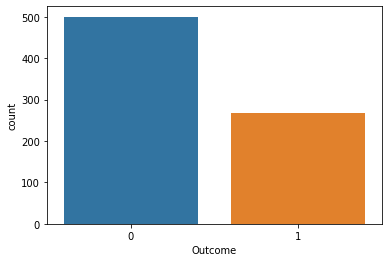

In [43]:
#plot the countplot for Outcome column 
sns.countplot(data.Outcome)
plt.show()

In [44]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Here 
- o-->Not daibetes
- 1-->Daibetes

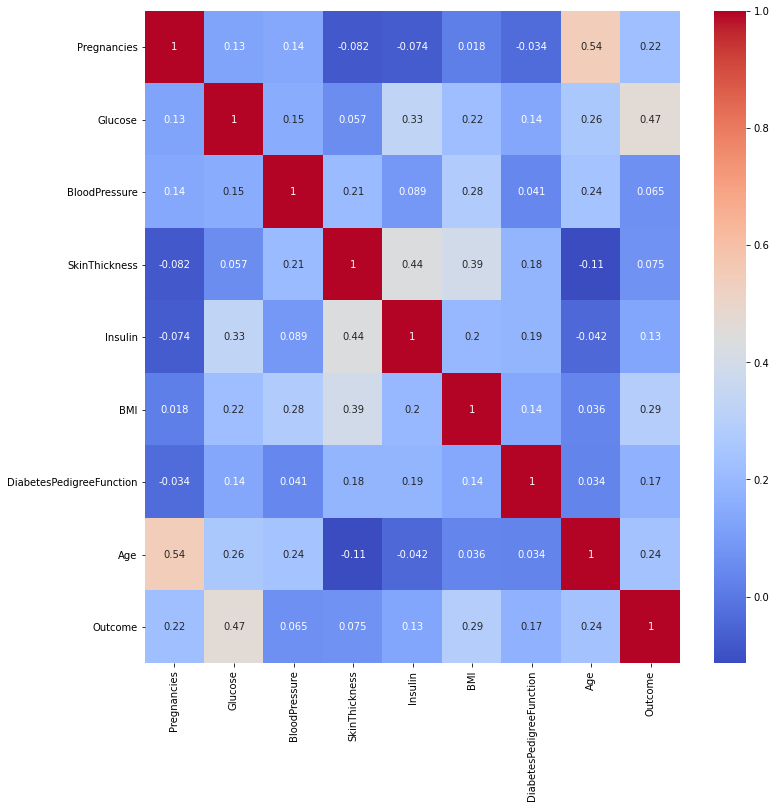

In [45]:
cor=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [46]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


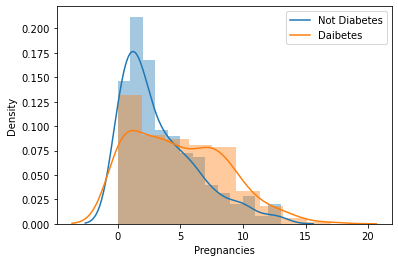

In [47]:
sns.distplot(data.Pregnancies[data.Outcome==0])
sns.distplot(data.Pregnancies[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


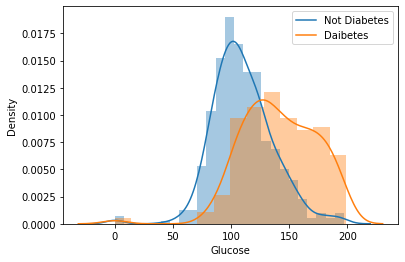

In [48]:
sns.distplot(data.Glucose[data.Outcome==0])
sns.distplot(data.Glucose[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


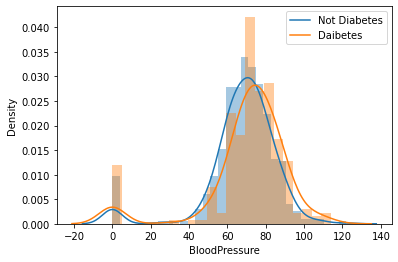

In [49]:
sns.distplot(data.BloodPressure[data.Outcome==0])
sns.distplot(data.BloodPressure[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


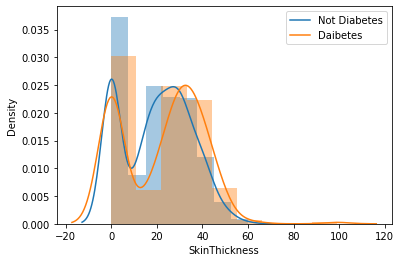

In [50]:
sns.distplot(data.SkinThickness[data.Outcome==0])
sns.distplot(data.SkinThickness[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


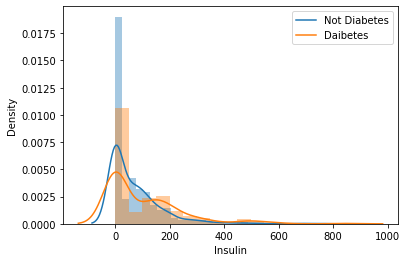

In [51]:
sns.distplot(data.Insulin[data.Outcome==0])
sns.distplot(data.Insulin[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


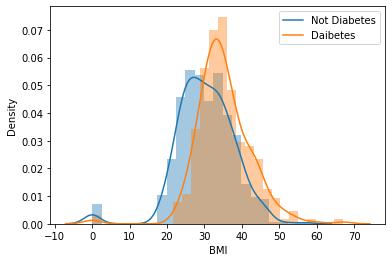

In [52]:
sns.distplot(data.BMI[data.Outcome==0])
sns.distplot(data.BMI[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


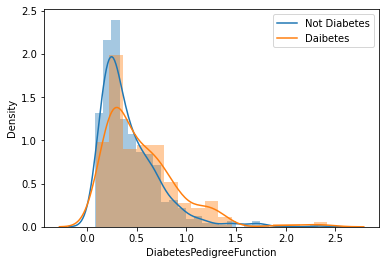

In [53]:
sns.distplot(data.DiabetesPedigreeFunction[data.Outcome==0])
sns.distplot(data.DiabetesPedigreeFunction[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


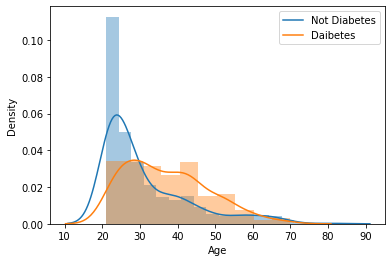

In [54]:
sns.distplot(data.Age[data.Outcome==0])
sns.distplot(data.Age[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

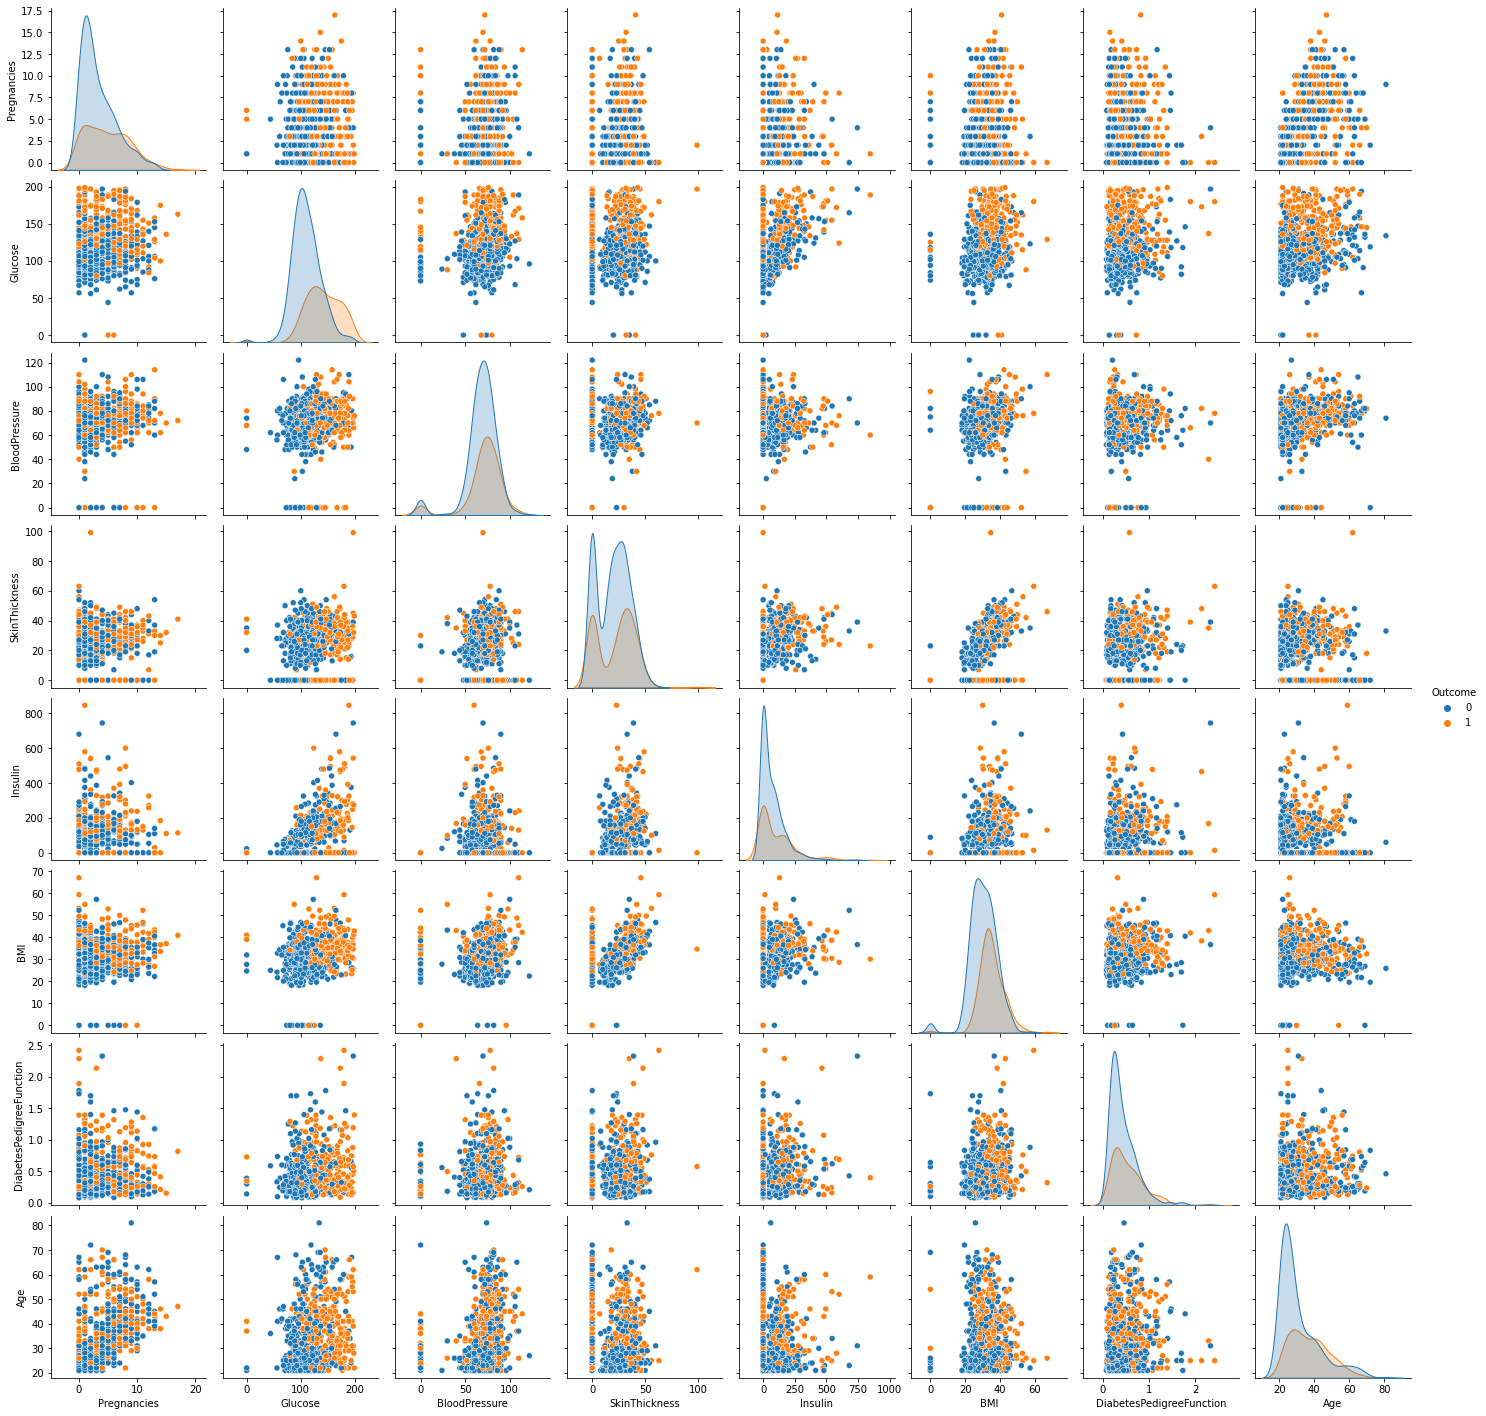

In [55]:
sns.pairplot(data=data,hue='Outcome',diag_kind='kde')
plt.show()

#### Logistic Regression
My understanding Logistic regression is a regression model where the dependent variable is categorical.

The prediction will be 0 or 1, Yes or No

- Pima daibetes dataset contain all numerical values

In [56]:
#input and output selection
ip=data.drop(['Outcome'],axis=1)
op=data['Outcome']

In [57]:
#Train & Test the Dataset

from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.4)

In [58]:
#Scalling Our Dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [59]:
from sklearn.linear_model import LogisticRegression
alg=LogisticRegression()

In [60]:
#train the algorithm with the training data
alg.fit(xtr,ytr)
yp=alg.predict(xts)

In [61]:
#Checking the Accuacy of our Model

from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[177  28]
 [ 44  59]]


In [62]:
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.7662337662337663


In [63]:
precission=metrics.precision_score(yts,yp)
print(precission)

0.6781609195402298


In [64]:
recall=metrics.recall_score(yts,yp)
print(recall)

0.5728155339805825


#### Naive Bayes classifier
It is easy and fast to predict class of test data set. It also perform well in multi class prediction

In [65]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.1)

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [67]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(xtr,ytr)
yp=GNB.predict(xts)

In [68]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[47  8]
 [12 10]]


In [69]:
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.7402597402597403


In [70]:
recall=metrics.recall_score(yts,yp)
print(recall)

0.45454545454545453


#### K-NEAREST NEIGHBOUR
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems

KNN algorithm the nearest distance is calculated

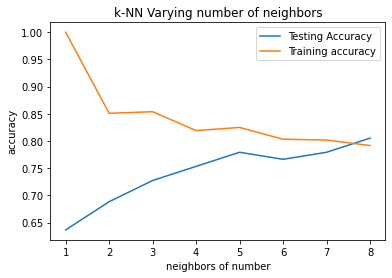

In [71]:
from sklearn.neighbors import KNeighborsClassifier

neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtr,ytr)
  train_accuracy[i]=knn.score(xtr,ytr)
  test_accuracy[i]=knn.score(xts,yts)

plt.xlabel('neighbors of number')
plt.ylabel('accuracy')
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.1)

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [74]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtr,ytr)
yp=knn.predict(xts)

In [75]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[43 12]
 [ 8 14]]


In [76]:
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.7402597402597403


In [77]:
recall = metrics.recall_score(yts,yp,average='macro')
print(recall)

0.7090909090909091


#### SUPPORT VECTOR MACHINES-SVM

Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression

In [78]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.3)

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [80]:
from sklearn import svm

alg=svm.SVC(C=30,gamma=0.03)

#train the algorithm with training data
alg.fit(xtr,ytr)
yp=alg.predict(xts)

In [81]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[138  16]
 [ 36  41]]


In [82]:
from sklearn import metrics
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.7748917748917749


In [83]:
recall = metrics.recall_score(yts,yp)
print(recall)

0.5324675324675324


#### DECISSION TREE
Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables

In [84]:
#spliting training and testing data
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.2)

In [85]:
#standard scalar transform

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [86]:
#model training
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')

In [87]:
# Train Decision Tree Classifer
dtc=dtc.fit(xtr,ytr)

In [88]:
#Predict the response for test dataset
y_pred=dtc.predict(xts)

In [89]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,y_pred)
print(cm)

[[79 26]
 [20 29]]


In [90]:
accuracy=metrics.accuracy_score(yts,y_pred)
print(accuracy)

0.7012987012987013


In [91]:
recall=metrics.recall_score(yts,y_pred)
print(recall)

0.5918367346938775


### by Kaggle Contributor [EDA, Acc_89%,F1 Score_89,Precision_89.5]
https://www.kaggle.com/omkargurav/diabetes-eda-acc-89-f1-score-89-precision-89-5

0. Exploratory Data Analysis and Visualization
1. Data Normalized Distribution
2. Data Up-Sampling for Imbalance data
3. Feature Engineering and Selection
4. Fine tuning of Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [2]:
#data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

data = pd.read_csv("https://raw.githubusercontent.com/jiai-edu/teaching_ep_elementary-phython/master/datasets/Pima_Indians_Diabetes.csv")
data.head(10)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...                     0.232   54        1

[10 rows x 9 columns]

####Overlooking whole data in a single window.

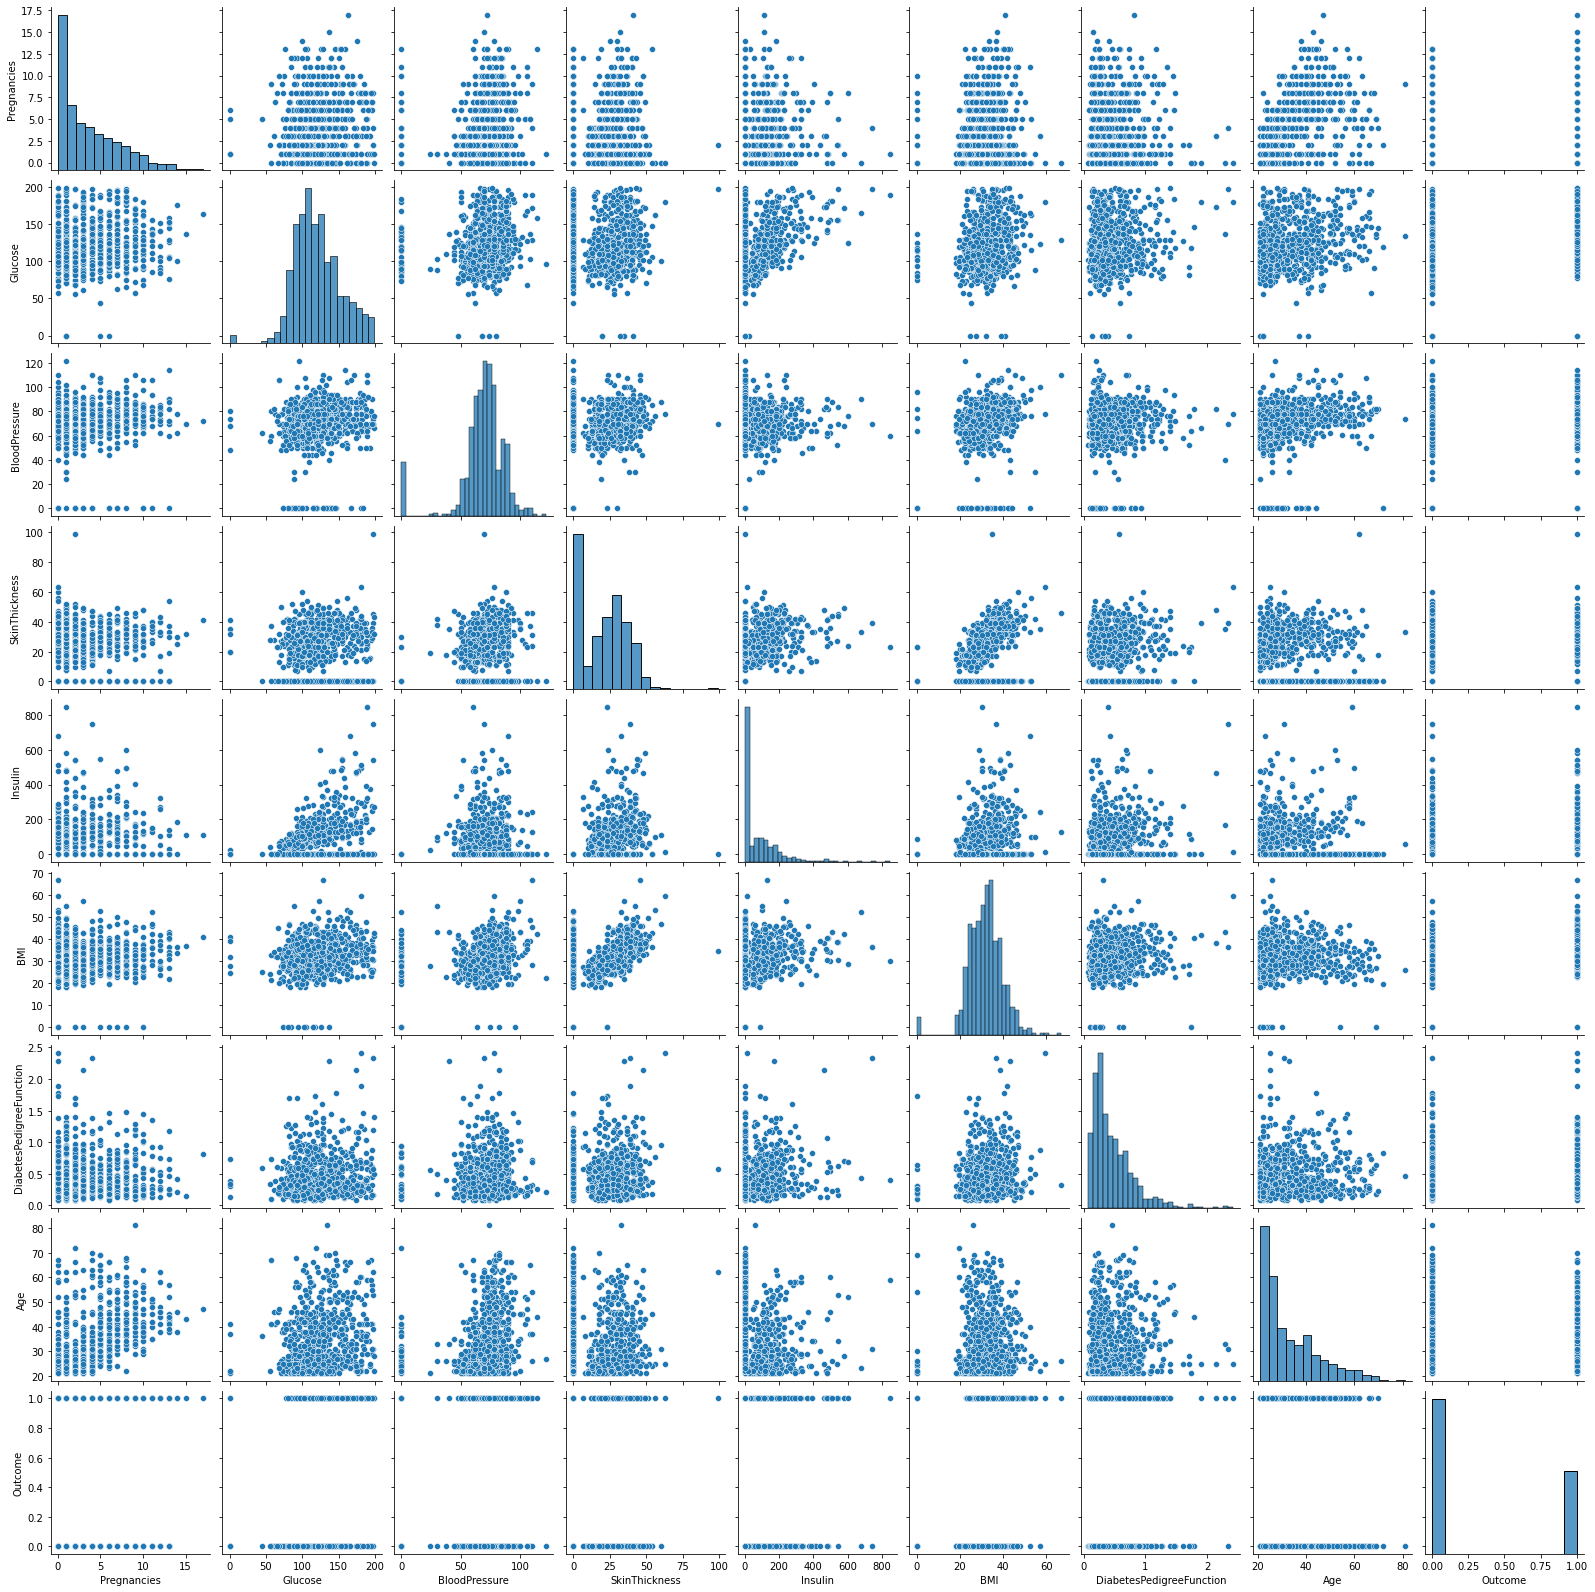

In [3]:
sns.pairplot(data)

# Looks major of the attributes contain Non-Normally Distributed data points. Also Data is seriously imbalance.

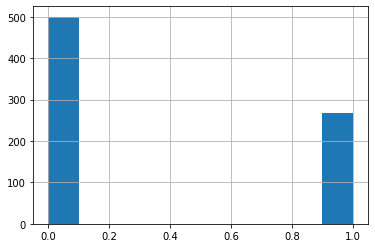

In [4]:
data["Outcome"].hist()

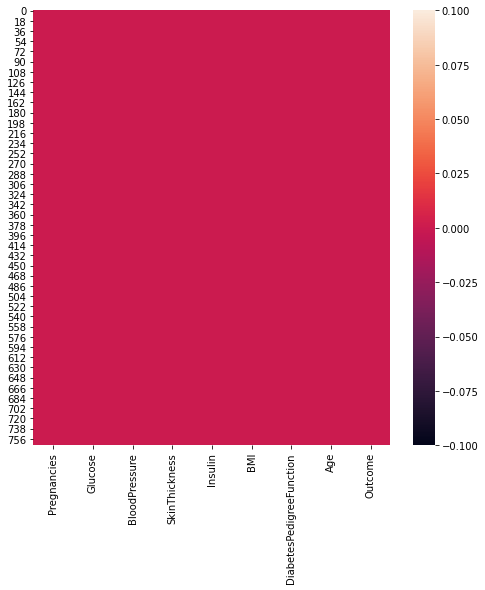

In [5]:
# Checking for null values distribution...

plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [6]:
data.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [7]:
#Checking for feature importance of attributes... By feeding data to Classifier

X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]

Pregnancies -> 0.08265495
Glucose -> 0.34031582
BloodPressure -> 0.05761176
SkinThickness -> 0.085814446
Insulin -> 0.07284074
BMI -> 0.14332853
DiabetesPedigreeFunction -> 0.08399398
Age -> 0.13343978


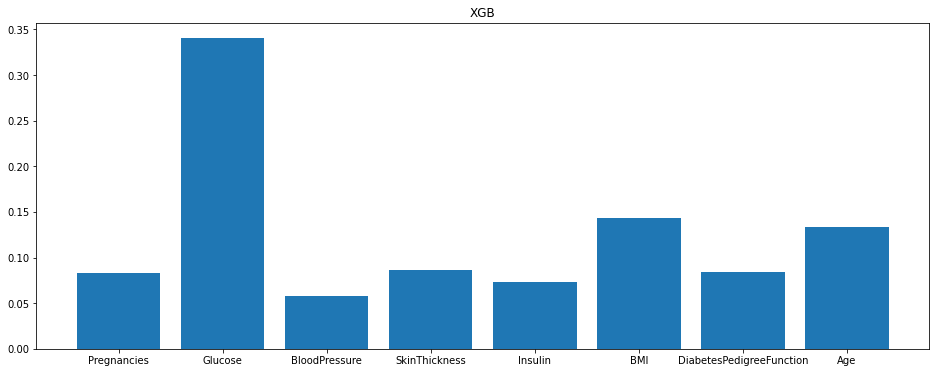

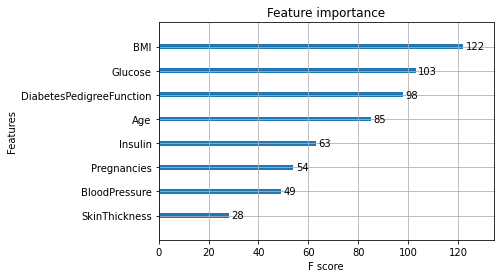

In [8]:
XGBR = XGBClassifier()
XGBR.fit(X,Y)
features = XGBR.feature_importances_
Columns = X.columns
for i,j in enumerate(features):
  print(Columns[i],"->",j)

plt.figure(figsize=(16,6))
plt.title(label="XGB")
#plt.bar([x for x in range(len(features))],features)
plt.bar([x for x in (Columns)],features)
plt.show()

plot_importance(XGBR)

From above graph we can say Skin "Thickness" is least important attribute.

Where "Glucose", "DiabetesPedigreeFunction","BMI" are oe of the most attributes.

Lets benchmark dataset i.e. train Classifier without any explicit featue engineering or modification in data.

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

0.8181818181818182


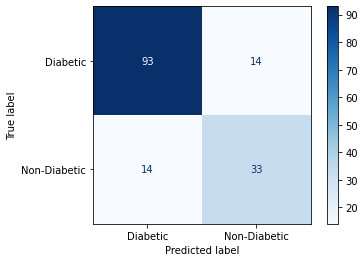

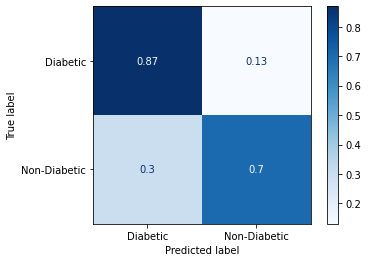

In [9]:
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

To performance lets adjust distribution of these attributes->

"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"

Taking log value of data-points of these features will distribute them normally.

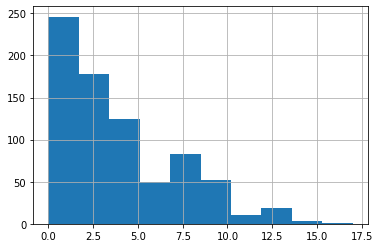

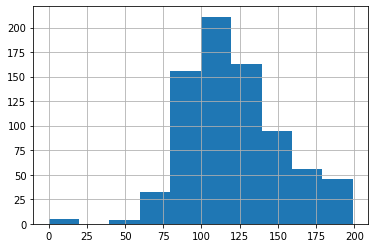

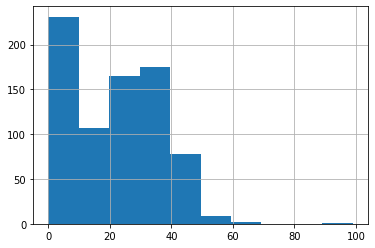

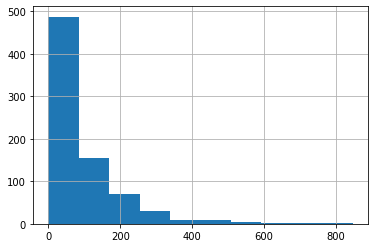

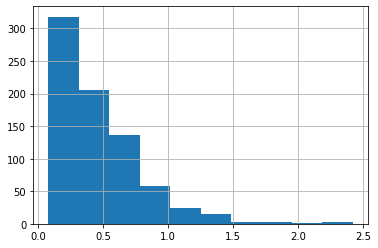

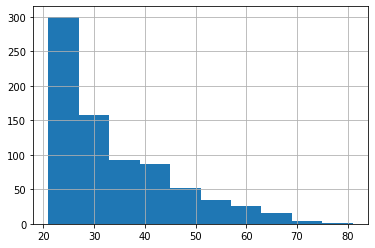

After normal distibution operation



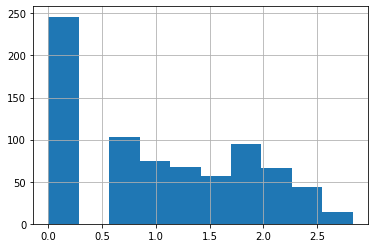

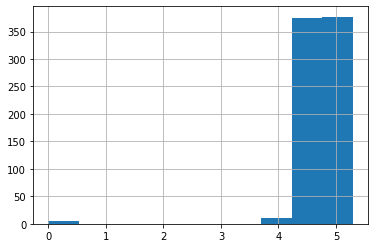

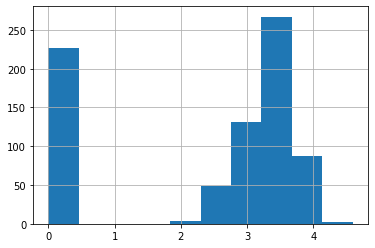

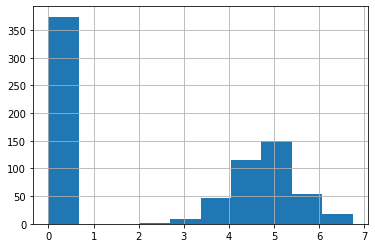

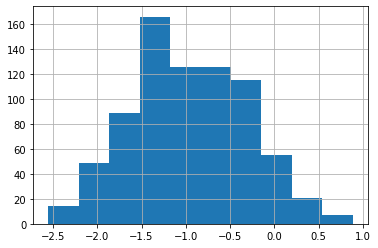

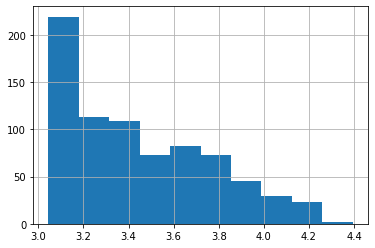

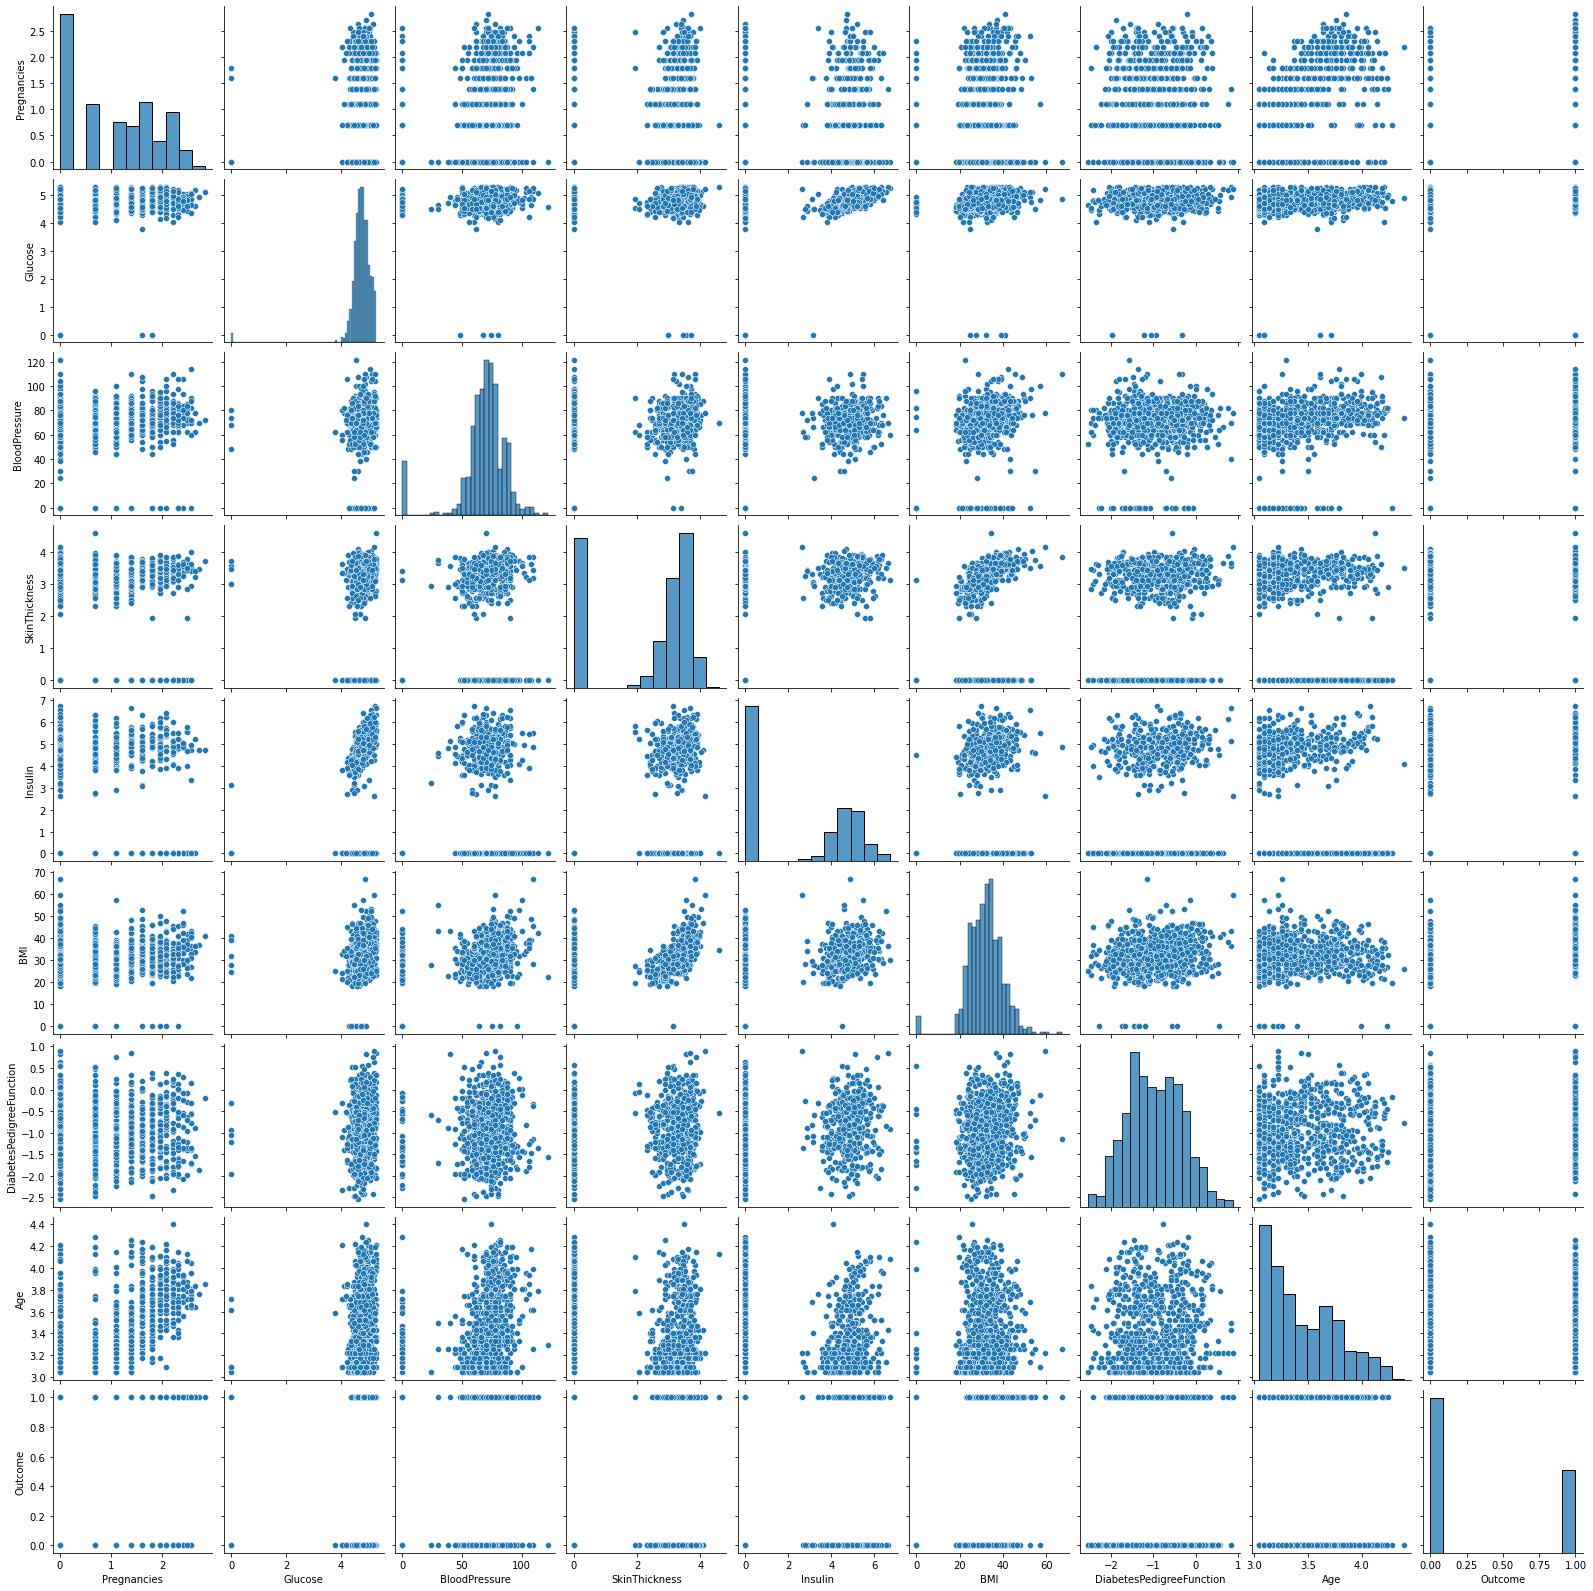

In [10]:
#"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"
data_new = data.copy()

data_new["Pregnancies"].hist()
plt.show()
data_new["Glucose"].hist()
plt.show()
data_new["SkinThickness"].hist()
plt.show()
data_new["Insulin"].hist()
plt.show()
data_new["DiabetesPedigreeFunction"].hist()
plt.show()
data_new["Age"].hist()
plt.show()


data_new["Pregnancies"] = [np.log(i) if i!=0 else 0 for i in data_new["Pregnancies"]]
data_new["Glucose"] = [np.log(i) if i!=0 else 0 for i in data_new["Glucose"]]
data_new["SkinThickness"] = [np.log(i) if i!=0 else 0 for i in data_new["SkinThickness"]]
data_new["Insulin"] = [np.log(i) if i!=0 else 0 for i in data_new["Insulin"]]
data_new["DiabetesPedigreeFunction"] = [np.log(i) if i!=0 else 0 for i in data_new["DiabetesPedigreeFunction"]]
data_new["Age"] = [np.log(i) if i!=0 else 0 for i in data_new["Age"]]

print("="*10,"\nAfter normal distibution operation\n")

data_new["Pregnancies"].hist()
plt.show()
data_new["Glucose"].hist()
plt.show()
data_new["SkinThickness"].hist()
plt.show()
data_new["Insulin"].hist()
plt.show()
data_new["DiabetesPedigreeFunction"].hist()
plt.show()
data_new["Age"].hist()
plt.show()

sns.pairplot(data_new)

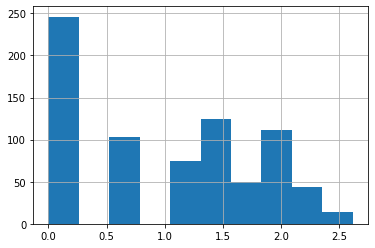

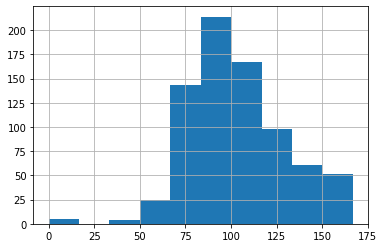

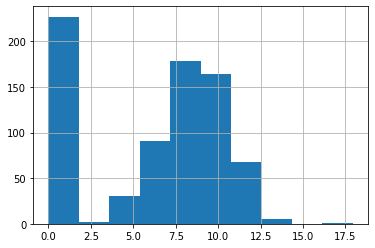

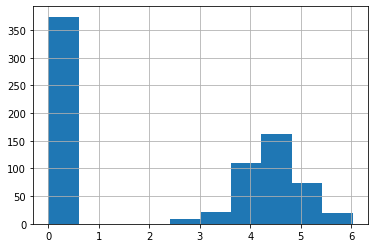

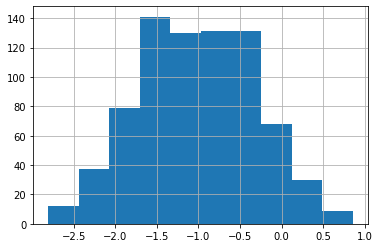

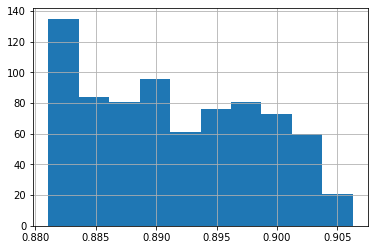

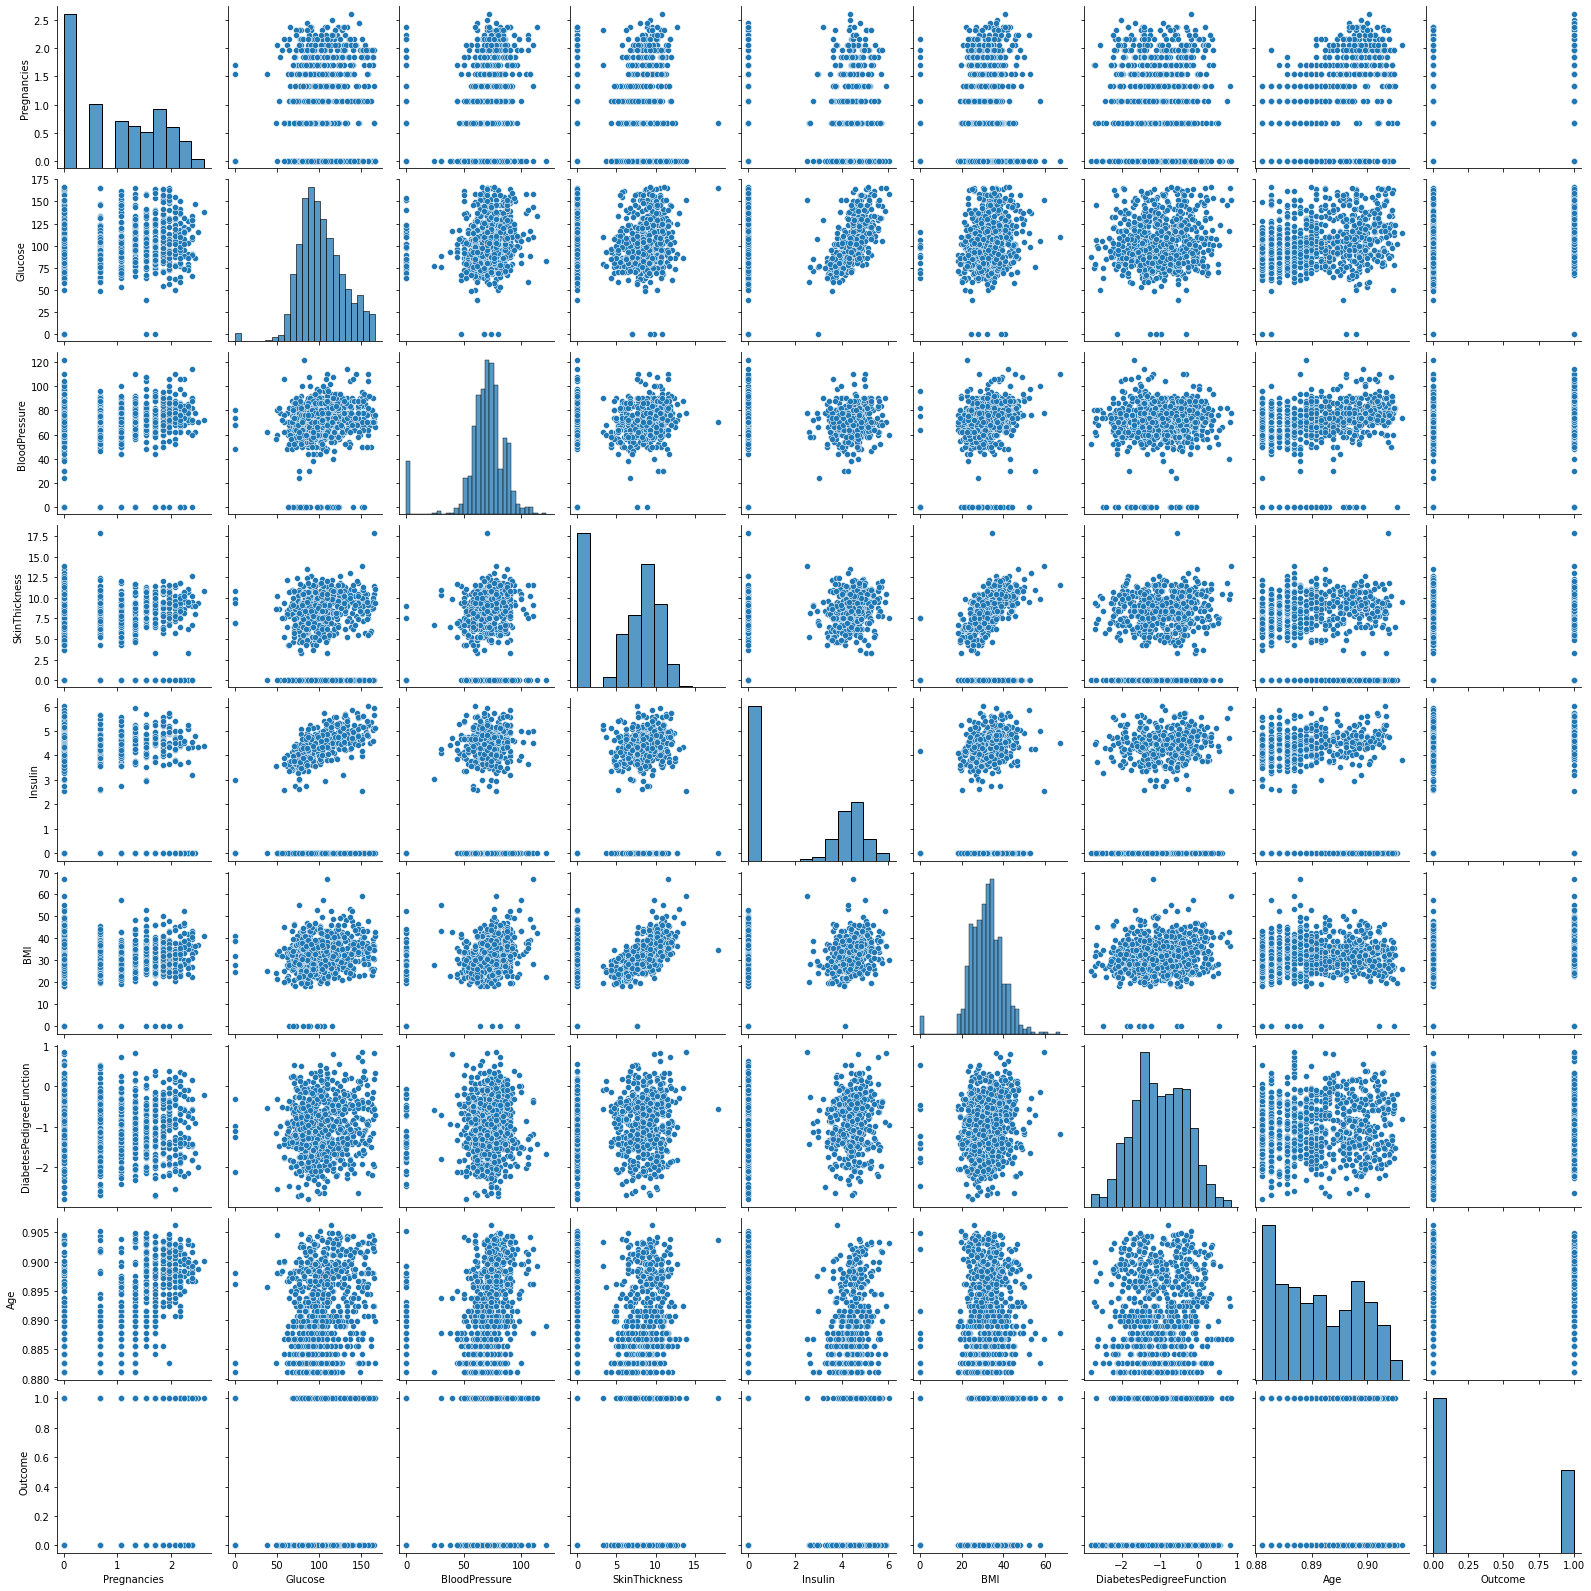

In [11]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
#"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"

data_boxcox = data.copy()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Pregnancies"].values]
data_boxcox["Pregnancies"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Pregnancies"],fitted_lambda)
data_boxcox["Pregnancies"].hist()
plt.show()


to_convert = [i if i!=0 else 1 for i in data_boxcox["Glucose"].values]
data_boxcox["Glucose"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Glucose"],fitted_lambda)
data_boxcox["Glucose"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["SkinThickness"].values]
data_boxcox["SkinThickness"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["SkinThickness"],fitted_lambda)
data_boxcox["SkinThickness"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Insulin"].values]
data_boxcox["Insulin"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Insulin"],fitted_lambda)
data_boxcox["Insulin"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["DiabetesPedigreeFunction"].values]
data_boxcox["DiabetesPedigreeFunction"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["DiabetesPedigreeFunction"],fitted_lambda)
data_boxcox["DiabetesPedigreeFunction"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Age"].values]
data_boxcox["Age"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Age"],fitted_lambda)
data_boxcox["Age"].hist()
plt.show()

sns.pairplot(data_boxcox)

In [12]:
print(data_new.describe())
print(data_boxcox.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      1.039014    4.739263  ...    3.448802    0.348958
std       0.855078    0.457964  ...    0.322702    0.476951
min       0.000000    0.000000  ...    3.044522    0.000000
25%       0.000000    4.595120  ...    3.178054    0.000000
50%       1.098612    4.762174  ...    3.367296    0.000000
75%       1.791759    4.943422  ...    3.713572    1.000000
max       2.833213    5.293305  ...    4.394449    1.000000

[8 rows x 9 columns]
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      0.989358  102.826163  ...    0.891511    0.348958
std       0.805370   26.442670  ...    0.007036    0.476951
min       0.000000    0.000000  ...    0.881083    0.000000
25%       0.000000   84.813379  ...    0.885521    0.000000
50%       1.064998   99.750084  ...    0.890797    0.000000
75%       1.703499

####Term Normally Distributed data referes to
1. Satndard Deviation of data = 1 and Mean of data = 0.
2. Graph plot of data gives Bell Curve


Intuition behind the the Nromal Data Distribution in simple langugae is Most of the data is
at near Mean of the whole data.

68% data points relie between -1 and 1
95% data points reliw between -2 and 2

Standard deviation ensures that all the data points are grouped together and having specific range.
Infact Stadard deviation = 1 removes outliers from data. Outliers are the points which not fit
in the normal range of points. It is simply away from the mean.

From above graphs after logarithm value method and BoxCox method both are removing outliers from data.
Graph shows data after BoxCox method data is normally distributed.
Where mathematical values are showing log value has removed outliers

We will try both methods.

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       106
           1       0.72      0.71      0.72        48

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

0.8246753246753247


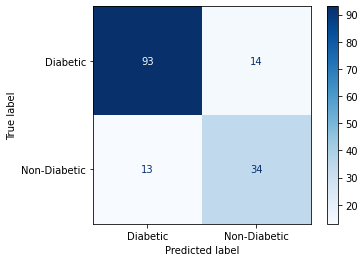

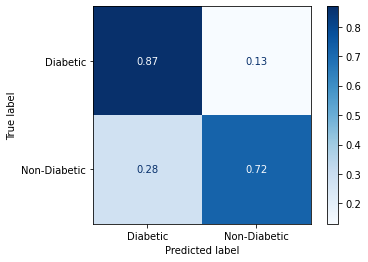

In [13]:
X = data_boxcox.drop(["Outcome"],axis=1)
Y = data_boxcox["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       106
           1       0.72      0.71      0.72        48

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

0.8246753246753247


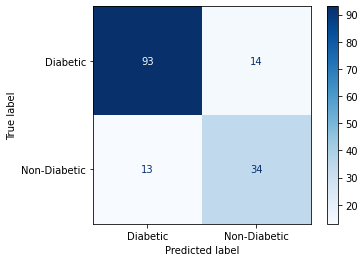

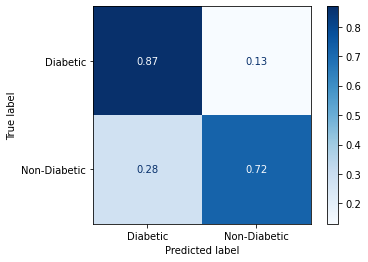

In [14]:
X = data_new.drop(["Outcome"],axis=1)
Y = data_new["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

Accuracy increased significantly!!!.😀
One more noticable thing is improvement in performance of model for second class.
Look at Precision, Recall and F1 Score is increased for first class but also for second class.

Now lets tackle second problem which is Imabalance Data.

Count of Negative class:  500
Count of Positive class:  268


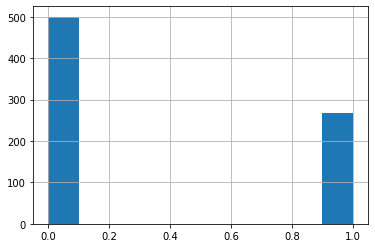

In [15]:
print("Count of Negative class: ",list(data["Outcome"]).count(0))
print("Count of Positive class: ",list(data["Outcome"]).count(1))
data["Outcome"].hist()

Data is highly biased towards Negative outcome i.e "0" than positive "1".
Out of 768 records 500 records holds Negative outcome. Where only 268 records holds positive outcome.

To overcome this problem we can Up-Sample or Down-Sample data points according to Minority and Majority.

In [16]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.Outcome==0]
df_minority = data_bal[data_bal.Outcome==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=268,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Outcome.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Outcome.value_counts())

Downsampled data:->
 1    268
0    268
Name: Outcome, dtype: int64
Upsampled data:->
 1    500
0    500
Name: Outcome, dtype: int64


              precision    recall  f1-score   support

           0       0.77      0.67      0.71        60
           1       0.64      0.75      0.69        48

    accuracy                           0.70       108
   macro avg       0.71      0.71      0.70       108
weighted avg       0.71      0.70      0.70       108

0.7037037037037037


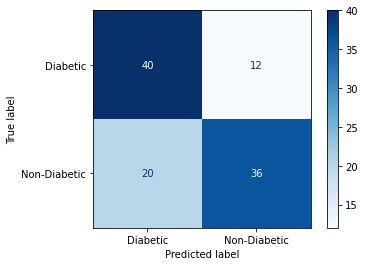

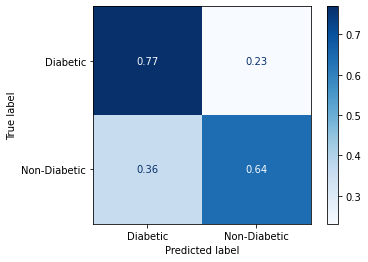

In [17]:
X = df_downsampled.drop(["Outcome"],axis=1)
Y = df_downsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        89
           1       0.89      0.82      0.85       111

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

0.845


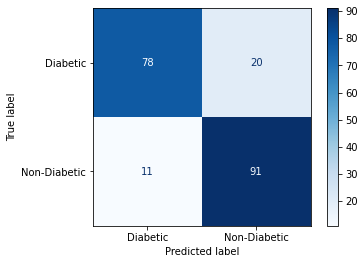

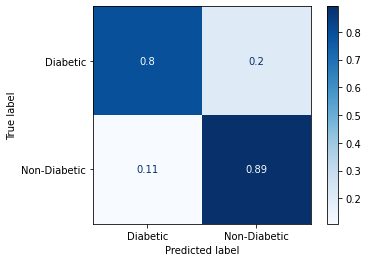

In [18]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

Accuracy and other metrics too says it all.
Up-Sampling is helpfull in our case to make data balanced.
Now to create an optimal model Fine-Tuning of model Classifer is needed.

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        86
           1       0.94      0.84      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.88      0.88       200

0.88


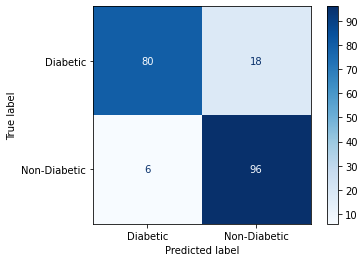

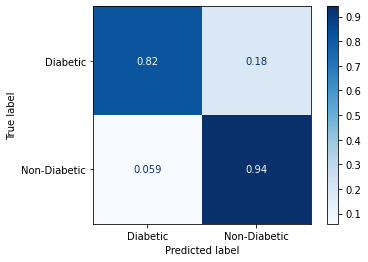

In [19]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

0.885


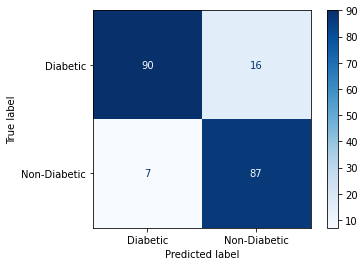

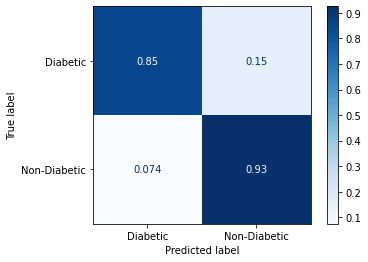

In [20]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

#RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

####Peak points till now:->
Benchmark : 75.97

XGB : 87.50

RF : 88.50

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        98
           1       0.83      0.76      0.80       102

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

0.8


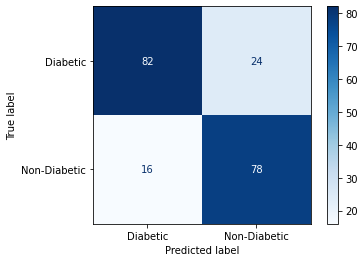

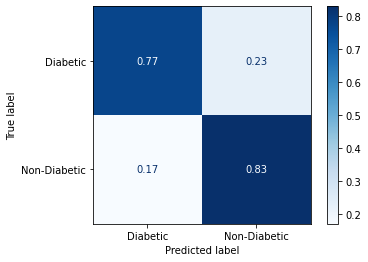

In [21]:
#Lets scale the data
StSc = StandardScaler()
MnMx = MinMaxScaler()

X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

X_train , X_test = MnMx.fit_transform(X_train) , MnMx.fit_transform(X_test)

RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

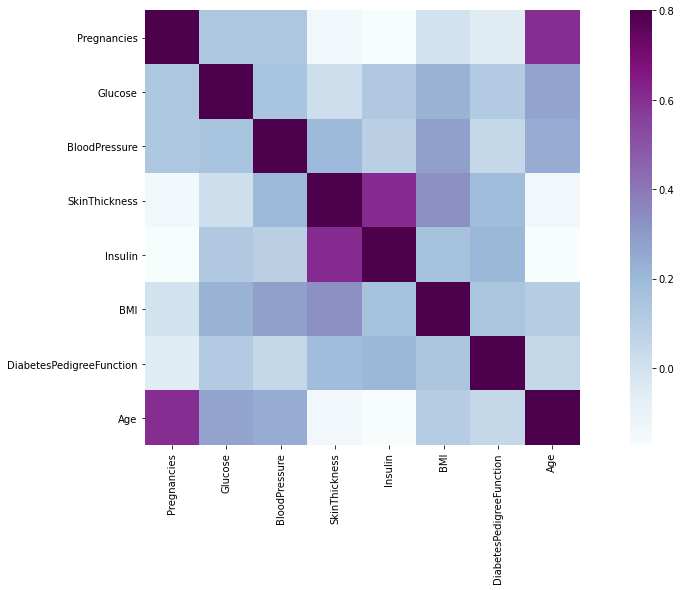

In [22]:
#Heat map of dataset with relative importance
matrix = data_boxcox.drop(["Outcome"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

Lets make action of Feature-Engineering.

Remember attributes "Pregnancies" , "SkinThickness" , "Insulin" are having less imporance so lets send them for rest.

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        96
           1       0.94      0.85      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

0.89


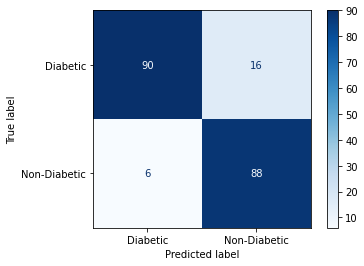

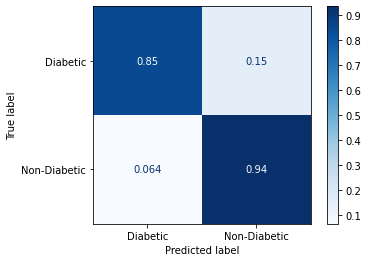

In [23]:
#X = df_upsampled.drop(["Outcome" , "Pregnancies" , "SkinThickness" ,"Insulin"],axis=1) # 0.89
X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

In [24]:
X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))


RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        96
           1       0.90      0.82      0.86       104

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Voting Ensemble:> 0.86
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       112
           1       0.70      0.75      0.73        88

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

SVM:> 0.75
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        96
           1       0.94      0.85      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


####Magical Outliers Removing Technique 🚀

In this method outliers will be removed from original data and will directly fitted in model without any
explicit feature engineering or sampling.

In [25]:
data_ = data.copy()
data_.loc[(data_.SkinThickness<5)& (data_.Outcome==0), 'SkinThickness']=int(data_[(data_.Outcome==0)]['SkinThickness'].mean())
data_.loc[(data_.SkinThickness<5)& (data_.Outcome==1), 'SkinThickness']=int(data_[(data_.Outcome==1)]['SkinThickness'].mean())
data_.loc[(data_.Insulin==0)& (data_.Outcome==0), 'Insulin']=int(data_[(data_.Outcome==0)]['Insulin'].mean())
data_.loc[(data_.Insulin==0)& (data_.Outcome==1), 'Insulin']=int(data_[(data_.Outcome==1)]['Insulin'].mean())

In [26]:
X = np.array(data_[["Pregnancies","BloodPressure","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
Y = np.array(data_.Outcome)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.87      0.82      0.85        50

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.89       154
weighted avg       0.90      0.90      0.90       154

Voting Ensemble:> 0.9025974025974026
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

SVM:> 0.7597402597402597
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.89      0.78      0.83        54

    accuracy                           0.89       154
   macro avg       0.89      0.86      0.87       154
weighted avg

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


####Results 💹📈

Benchmark : 75.97 <---> Without any processing

XGBoost : 87.50 <---> After Distribution Normalization + Up-Sampling + Feature Selection

XGBoost & Random Forest : 89.00 <---> After Distribution Normalization + Up-Sampling + Feature Selection + Fine Tuning + Random State in Data Spliting

Gradient Boosting Classifier : 92.20 <---> After removing outliers

In [27]:
np.mean(list(data.SkinThickness))

20.536458333333332

### aaa